In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
from google.colab import files
uploaded = files.upload()

Saving 2025-07-04T13-24-57.561Z-diabetes.csv to 2025-07-04T13-24-57.561Z-diabetes (1).csv


In [210]:
df=pd.read_csv('2025-07-04T13-24-57.561Z-diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [211]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [213]:
df.isnull().values.any()

np.False_

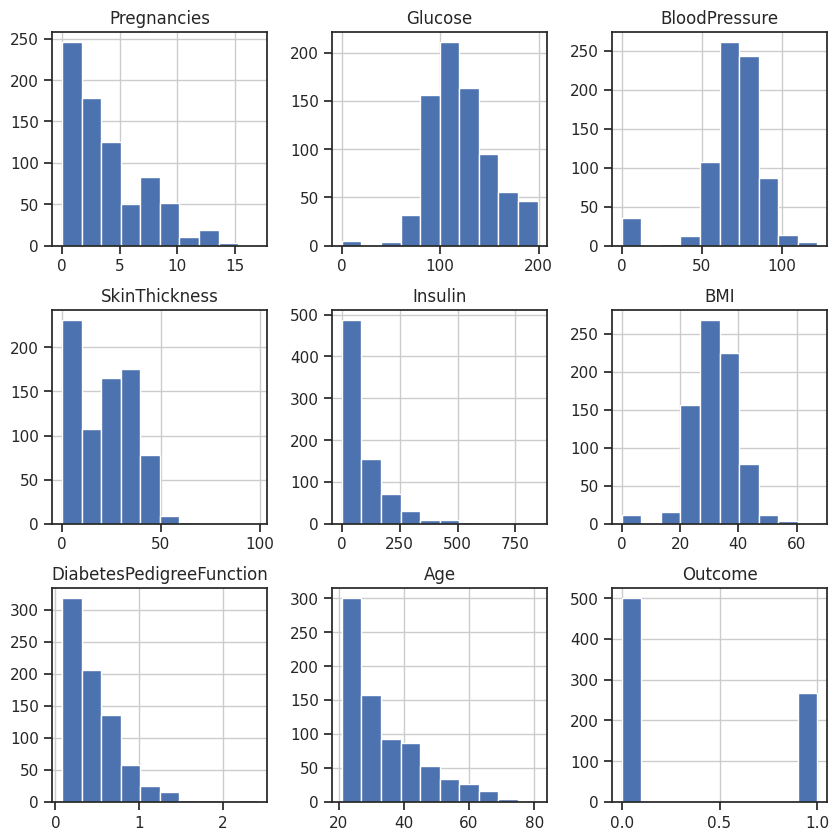

In [214]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [215]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


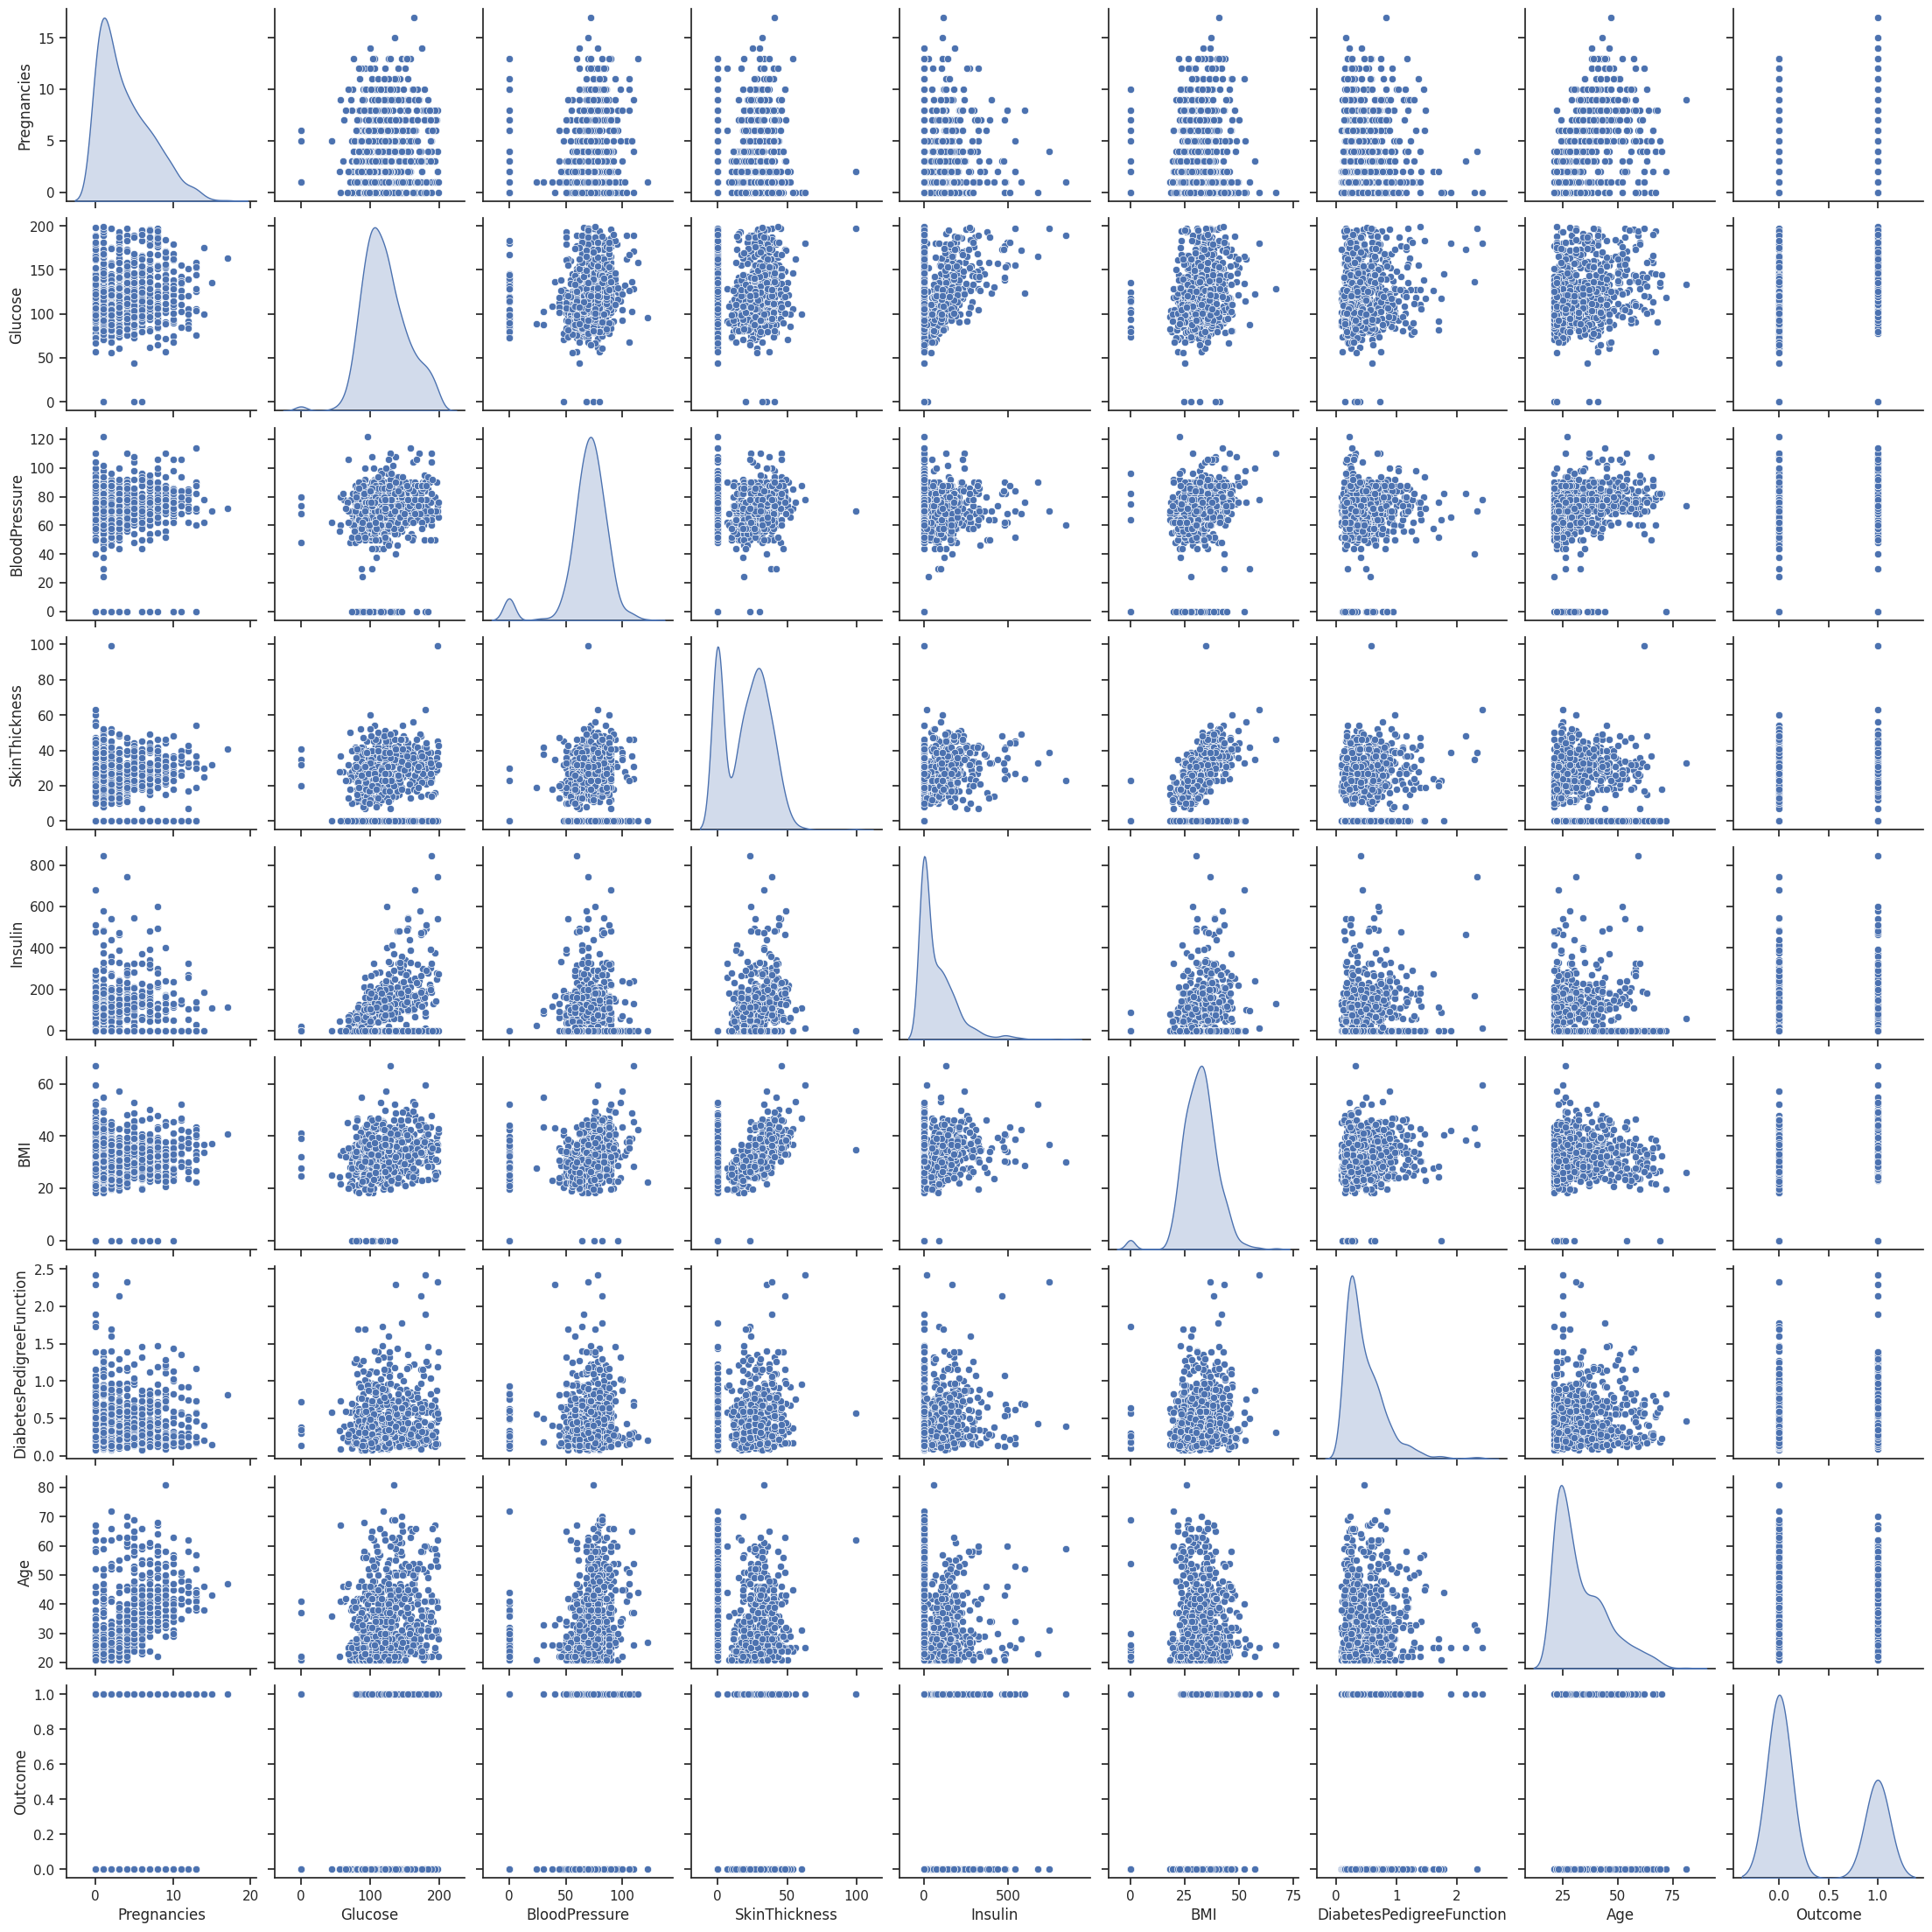

In [216]:
sns.pairplot(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']], diag_kind='kde')

<Axes: >

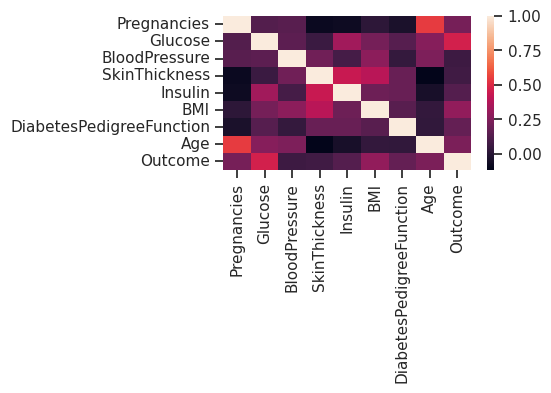

In [217]:
sns.heatmap(df.corr())

<Axes: xlabel='count', ylabel='Outcome'>

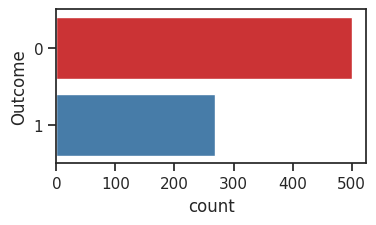

In [218]:
sns.countplot(y=df['Outcome'],palette='Set1')

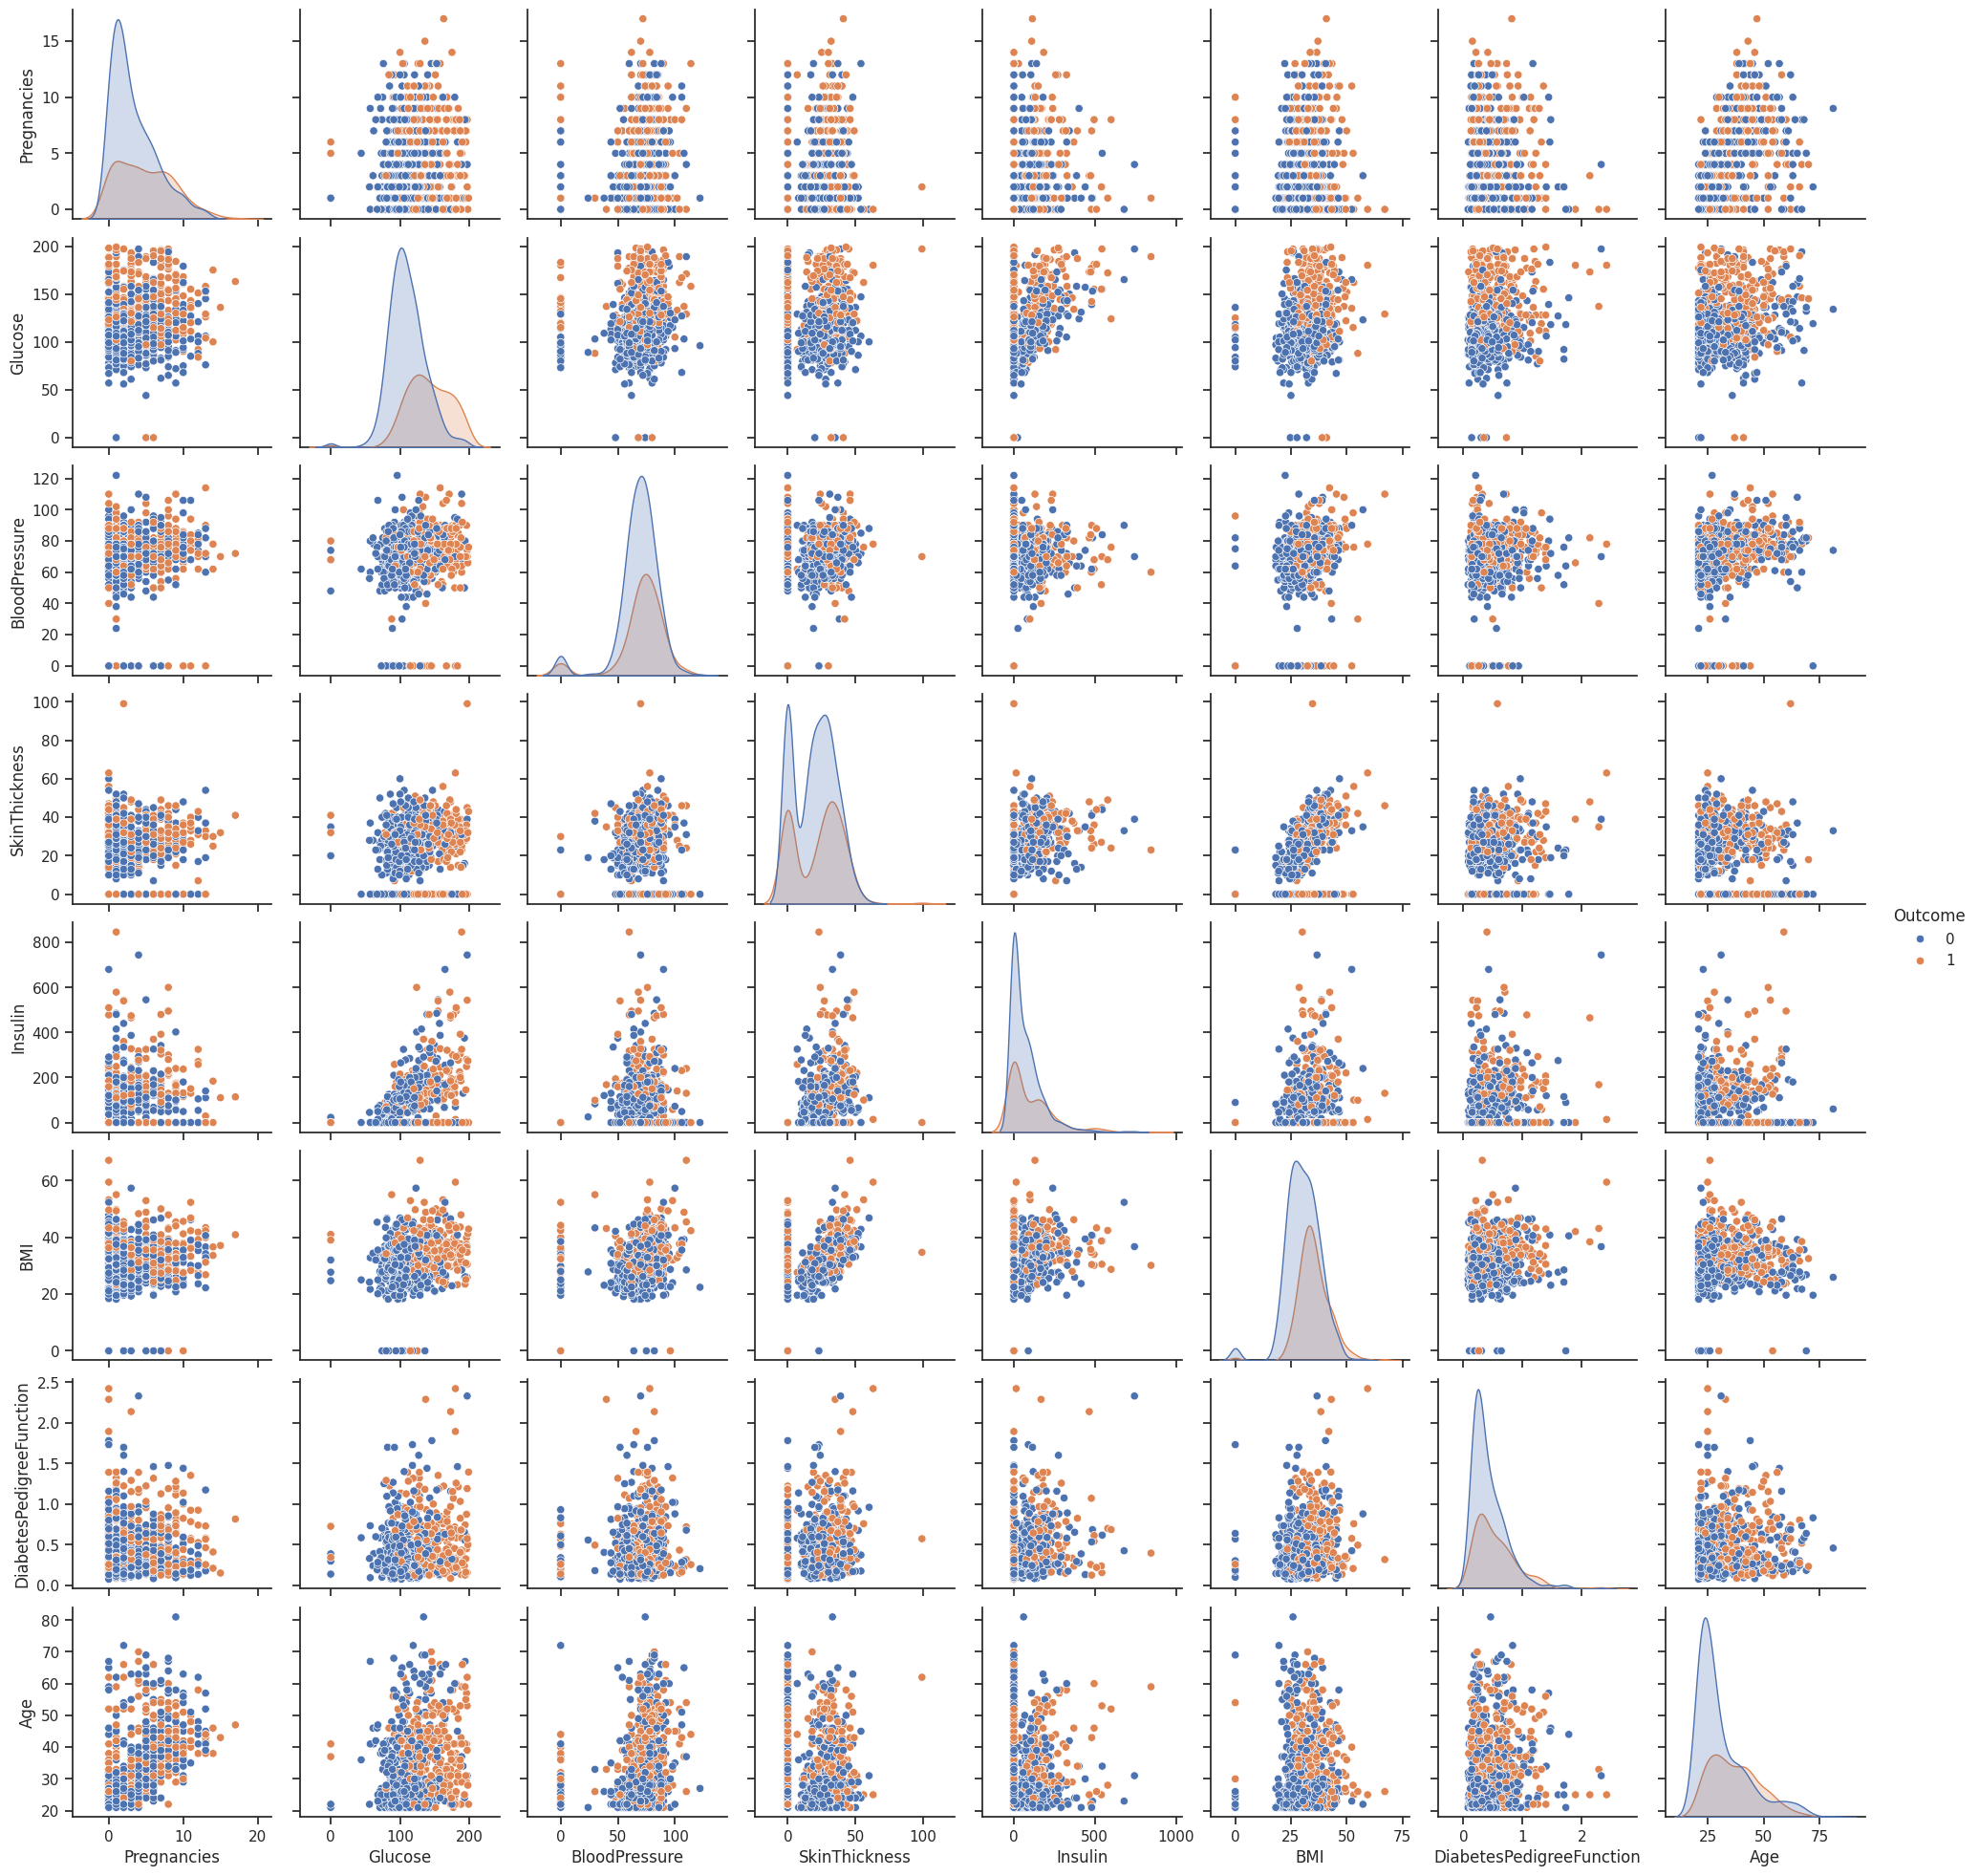

In [219]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: >

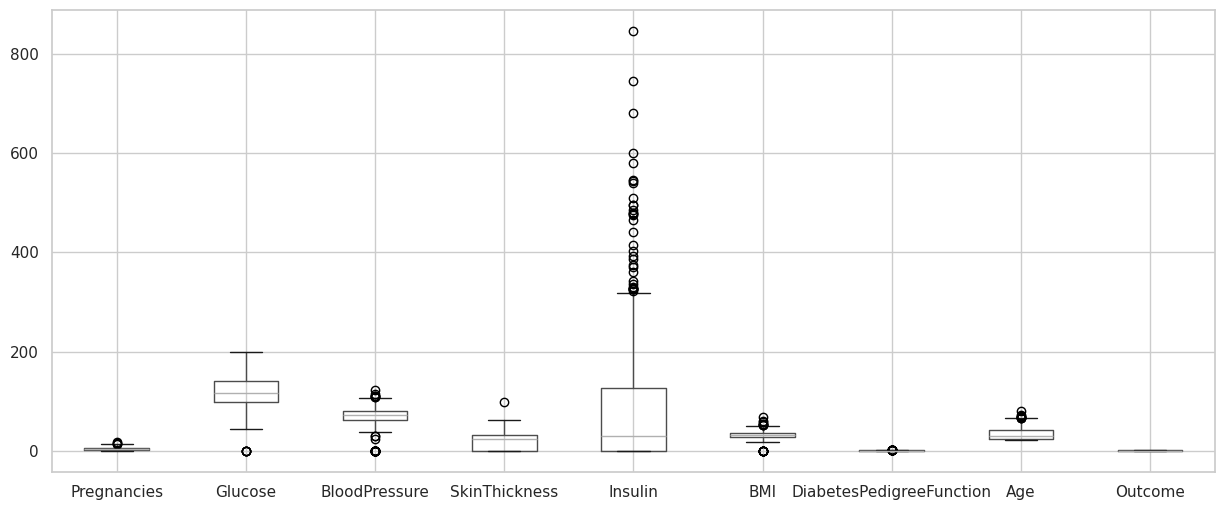

In [220]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

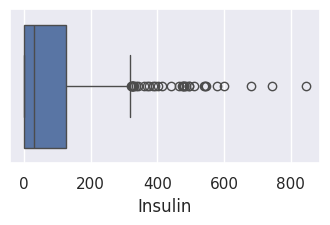

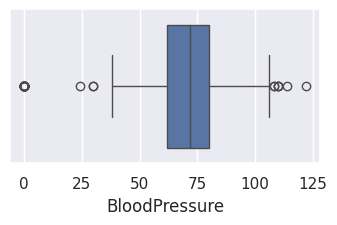

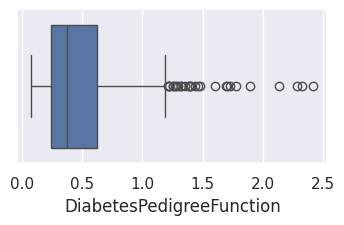

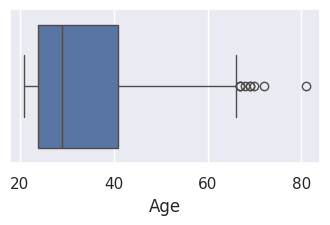

In [221]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()

In [222]:
# Calculate the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)
# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify outliers
outlier_mask = (df < lower_bound) | (df > upper_bound)

# Remove outliers
df_out = df[~outlier_mask.any(axis=1)]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_out.shape)

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

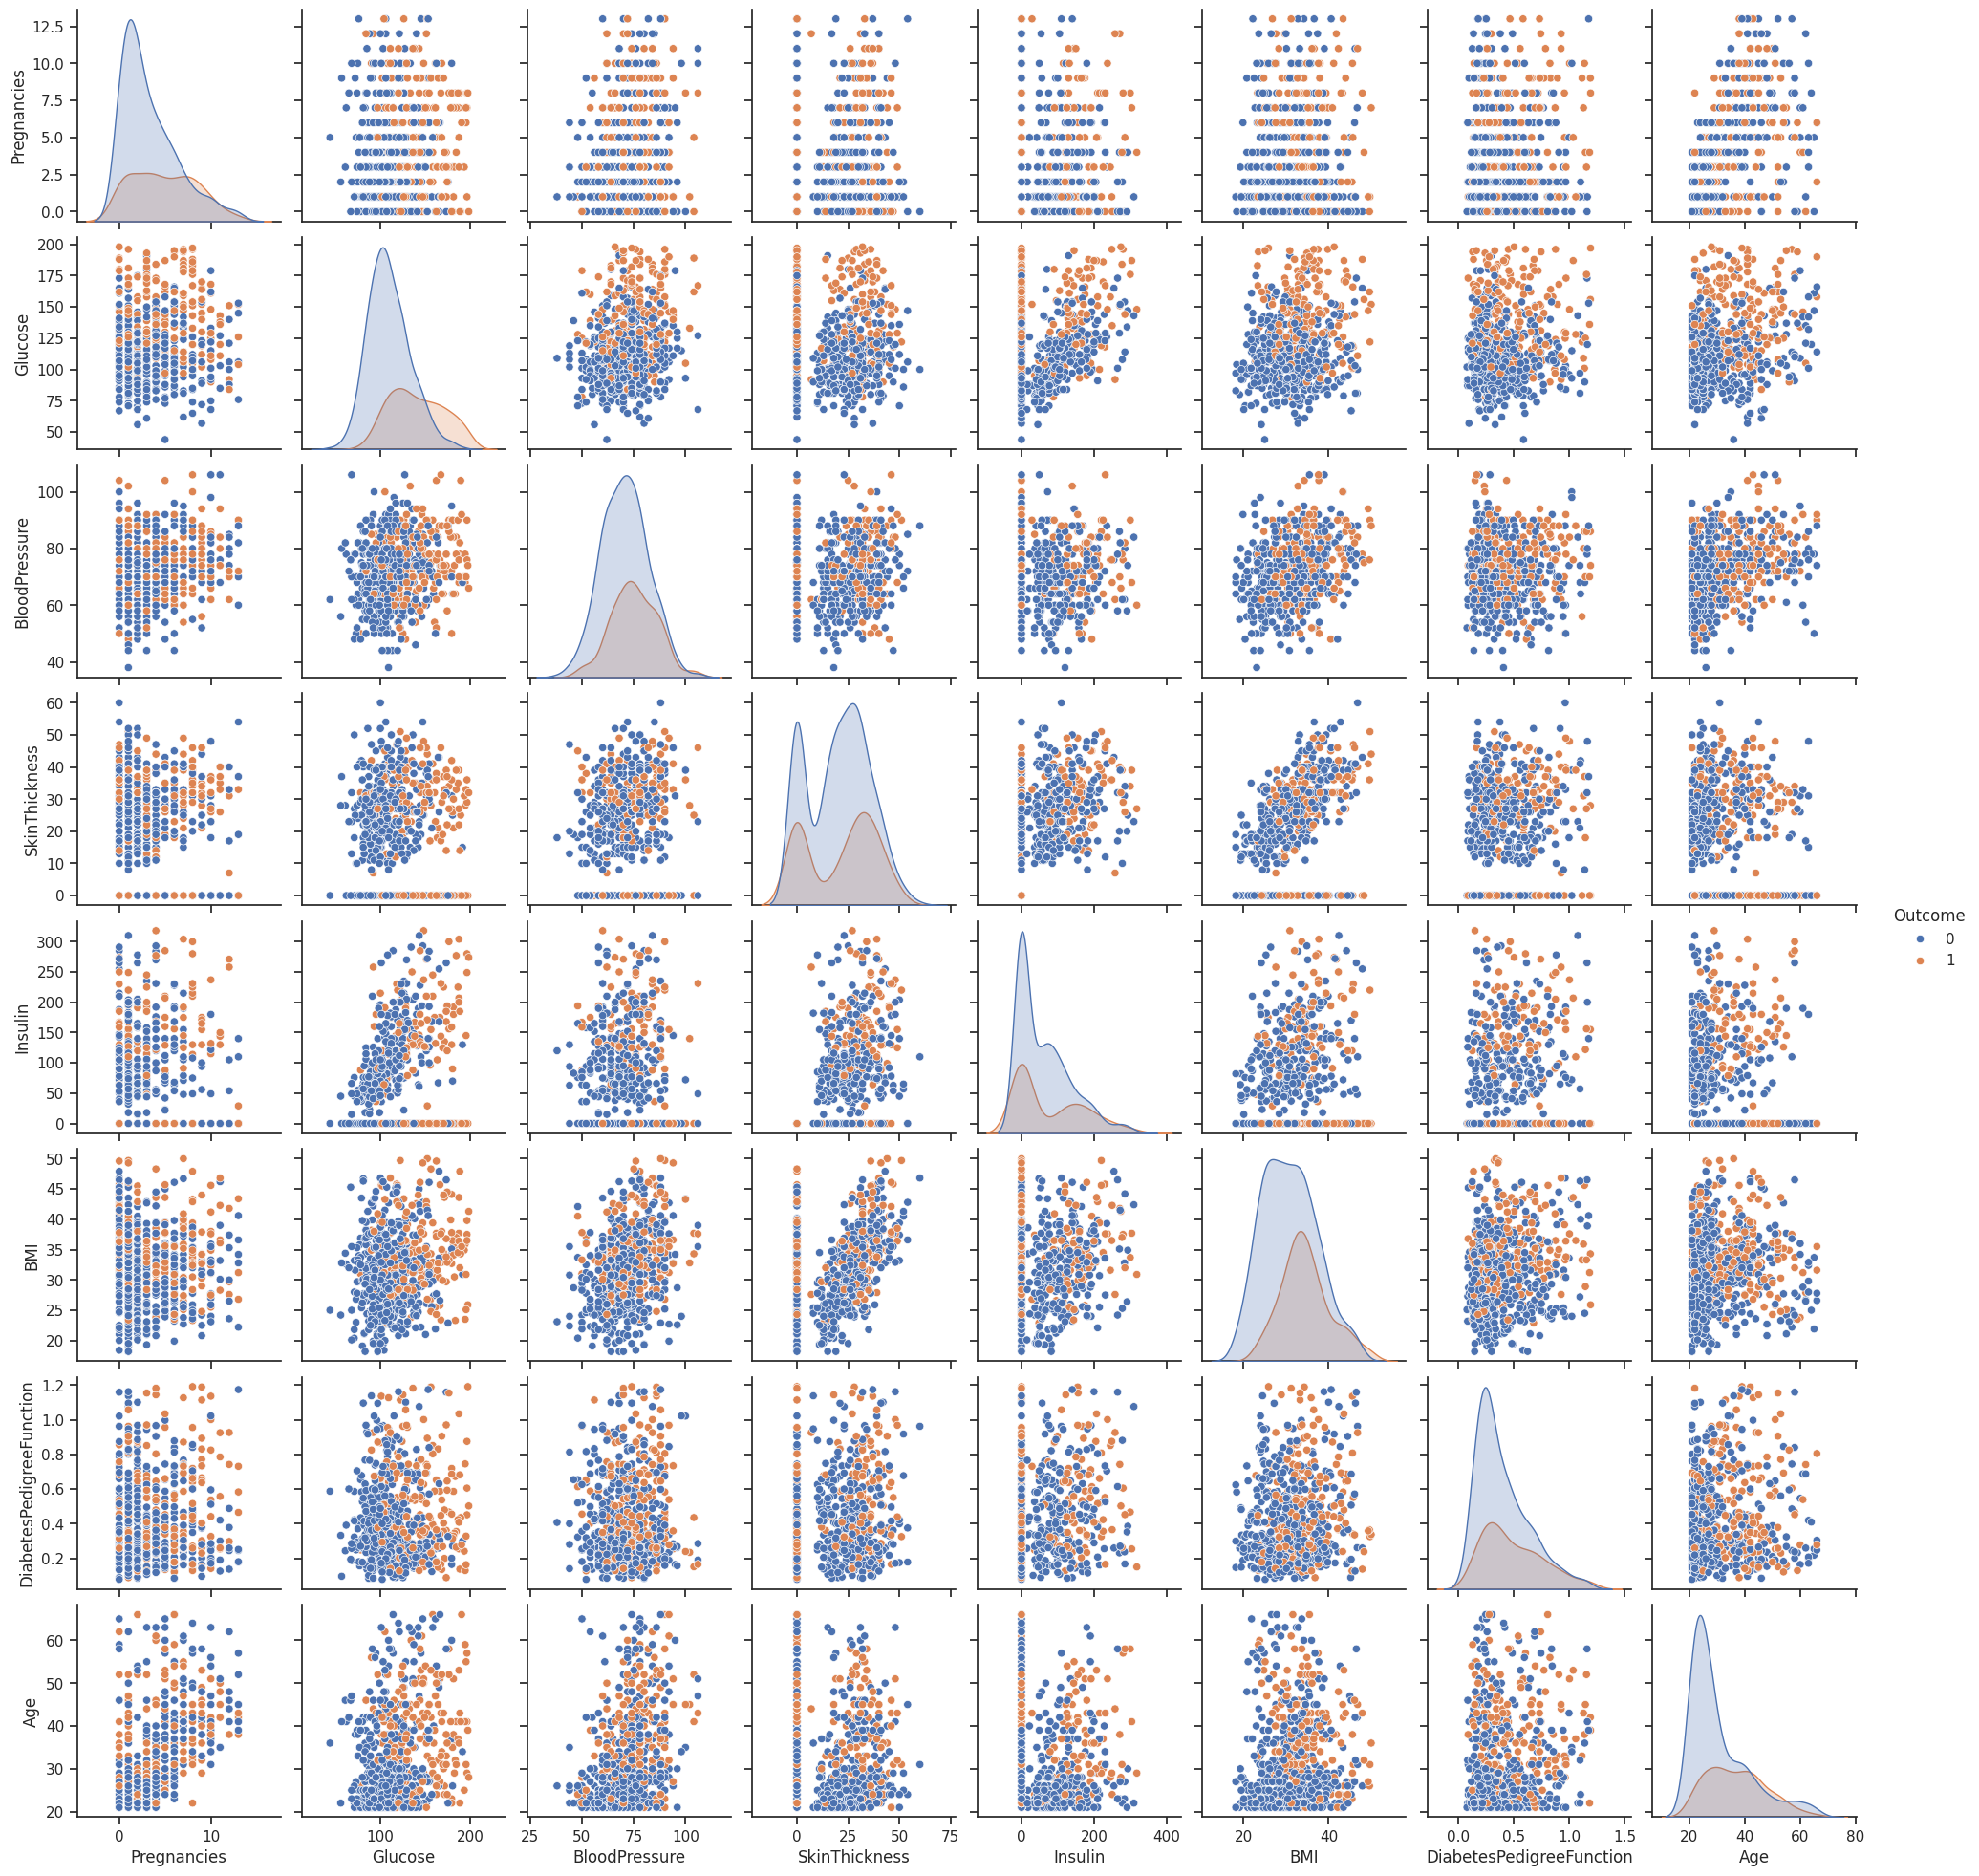

In [223]:
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

# Task
Train a logistic regression model on the `df_cleaned` DataFrame, evaluate its performance using a confusion matrix, F1 score, precision, recall, ROC curve, and AUC, and summarize the results.

## Split the data

### Subtask:
Split the cleaned data (`df_cleaned`) into training and testing sets.


**Reasoning**:
Define the features and target variables and split the data into training and testing sets using train_test_split.



In [224]:
X = df_out.drop(columns=['Outcome'])
y = df_out['Outcome']


In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,train_y,test_y=train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(train_X, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(test_X, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
722    -0.879418  1.004207      -0.393266       0.539350  0.733503 -0.428419   
213    -1.185954  0.694708      -0.656646       0.344528  0.770607  1.616003   
343     0.346728  0.075709       1.187015      -1.343926 -0.837214  0.401647   
306     1.879411  1.416873      -0.393266       0.149706  0.795343 -1.012540   
304    -0.266345  1.038596       0.309081      -1.343926 -0.837214 -1.704262   

     DiabetesPedigreeFunction       Age  
722                 -0.323523  0.804214  
213                  0.003544 -0.803165  
343                 -0.558851  0.000524  
306                 -0.415261  1.250708  
304                 -0.889906  0.357720


Scaled Test Data:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
108    -0.266345 -1.265454      -1.271200       0.669231 -0.614593  0.340161   
431    -0.266345 -1.059122       0.133494      -0.304877  0.214053 -0.259332   
690     1.266338 -0.440123       0.660254      -1.343926 -0.837214 -1.150884   
260    -0.266345  2.448537      -0.393266      -0.369818  0.770607 -0.182474   
755    -0.879418  0.282042       1.362601       1.188755  0.523250  0.678336   

     DiabetesPedigreeFunction       Age  
108                 -0.375375 -0.713867  
431                  0.482178  0.447019  
690                  1.698705  0.089823  
260                 -0.522954  0.089823  
755                  2.500417  0.357720

In [227]:
X_train_scaled.shape

(511, 8)

In [228]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_classification_report(model, X_test, y_test):
  """
  Prints the classification report, accuracy score, and confusion matrix
  for a given trained model.

  Args:
    model: A trained classification model (e.g., LogisticRegression, KNeighborsClassifier, etc.).
    X_test: The features of the testing data.
    y_test: The true labels of the testing data.
  """
  y_pred = model.predict(X_test)

  # Print Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # Print Accuracy Score
  accuracy = accuracy_score(y_test, y_pred)
  print("\nAccuracy Score:", accuracy)

  # Print Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("\nConfusion Matrix:\n", conf_matrix)

  # Plot Confusion Matrix (optional, but helpful visualization)
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

## Train the model

### Subtask:
Train a logistic regression model on the training data.


**Reasoning**:
Instantiate and train a logistic regression model on the training data.



In [229]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(train_X, train_y)

LogisticRegression(max_iter=500)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        92
           1       0.82      0.50      0.62        36

    accuracy                           0.83       128
   macro avg       0.82      0.73      0.75       128
weighted avg       0.83      0.83      0.81       128


Accuracy Score: 0.828125

Confusion Matrix:
 [[88  4]
 [18 18]]


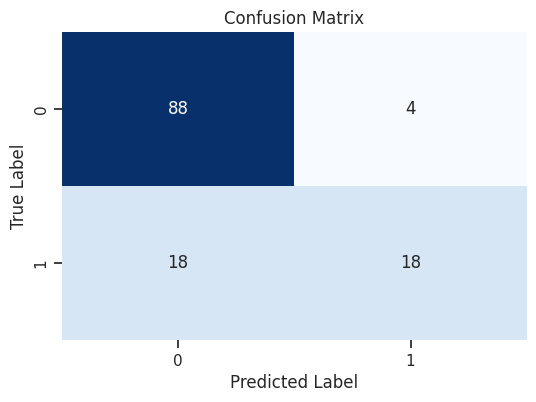

In [230]:
print_classification_report(model, test_X, test_y)

# Task
Train a KNN model on the training data, make predictions on the test data, and evaluate the model by calculating and displaying the confusion matrix, F1 score, precision, recall, ROC curve, and AUC.

## Train the model

### Subtask:
Train a KNN model on the training data (`train_X`, `train_y` or `X_train`, `y_train`).


**Reasoning**:
Train a KNN model on the training data.



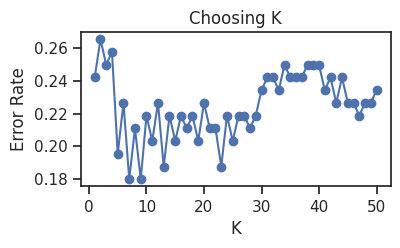

In [231]:
errors = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    pred_k = knn.predict(test_X)
    errors.append(1 - accuracy_score(test_y, pred_k))

plt.plot(range(1, 51), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

In [232]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=9)

# Train the KNN model
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=9)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        92
           1       0.74      0.56      0.63        36

    accuracy                           0.82       128
   macro avg       0.79      0.74      0.76       128
weighted avg       0.81      0.82      0.81       128


Accuracy Score: 0.8203125

Confusion Matrix:
 [[85  7]
 [16 20]]


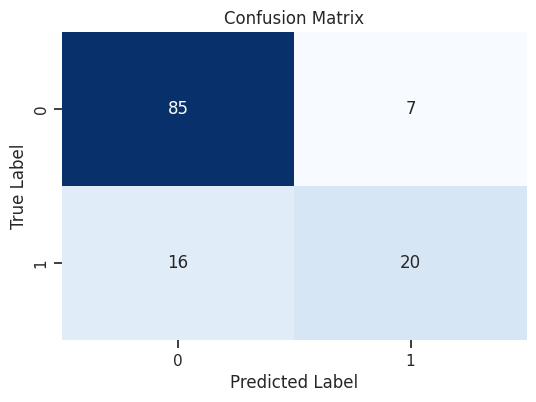

In [233]:
print_classification_report(knn, test_X, test_y)

# Task
Train a Decision Tree model on the training data, make predictions on the test data, and evaluate the model by displaying the confusion matrix, F1 score, precision, recall, ROC curve, and AUC.

## Train the model

### Subtask:
Train a Decision Tree classifier on the training data (`train_X`, `train_y` or `X_train`, `y_train`).


**Reasoning**:
Train a Decision Tree classifier on the training data.



In [234]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        92
           1       0.68      0.36      0.47        36

    accuracy                           0.77       128
   macro avg       0.74      0.65      0.66       128
weighted avg       0.76      0.77      0.75       128


Accuracy Score: 0.7734375

Confusion Matrix:
 [[86  6]
 [23 13]]


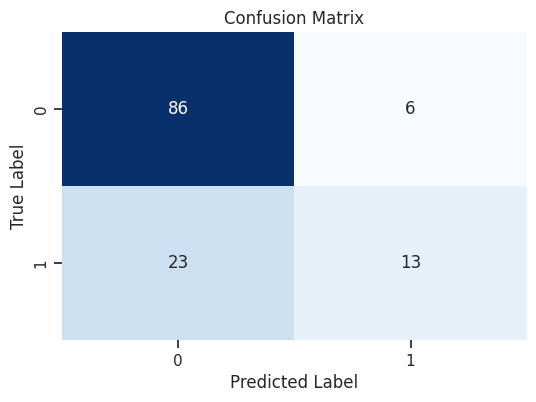

In [235]:
print_classification_report(dt_model, test_X, test_y)

# Task
Train a Random Forest model on the training data, make predictions on the test data, and evaluate the model by displaying the confusion matrix, F1 score, precision, recall, ROC curve, and AUC.

## Train the model

### Subtask:
Train a Random Forest classifier on the training data (`train_X`, `train_y` or `X_train`, `y_train`).


**Reasoning**:
Train a Random Forest classifier on the training data.



In [236]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf_model = RandomForestClassifier(n_estimators=1000,random_state=42)

# Train the Random Forest model
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=1000, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        92
           1       0.70      0.64      0.67        36

    accuracy                           0.82       128
   macro avg       0.78      0.77      0.77       128
weighted avg       0.82      0.82      0.82       128


Accuracy Score: 0.8203125

Confusion Matrix:
 [[82 10]
 [13 23]]


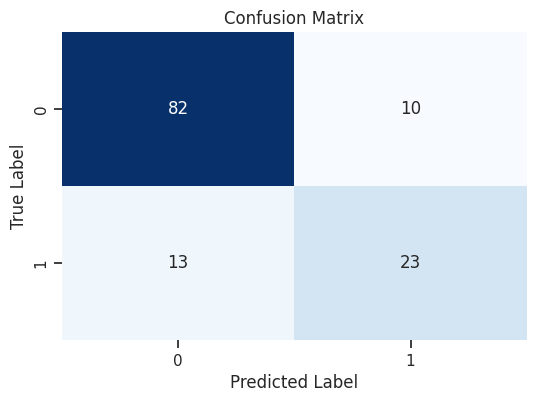

In [237]:
print_classification_report(rf_model, test_X, test_y)

### ROC Curve and AUC Comparison

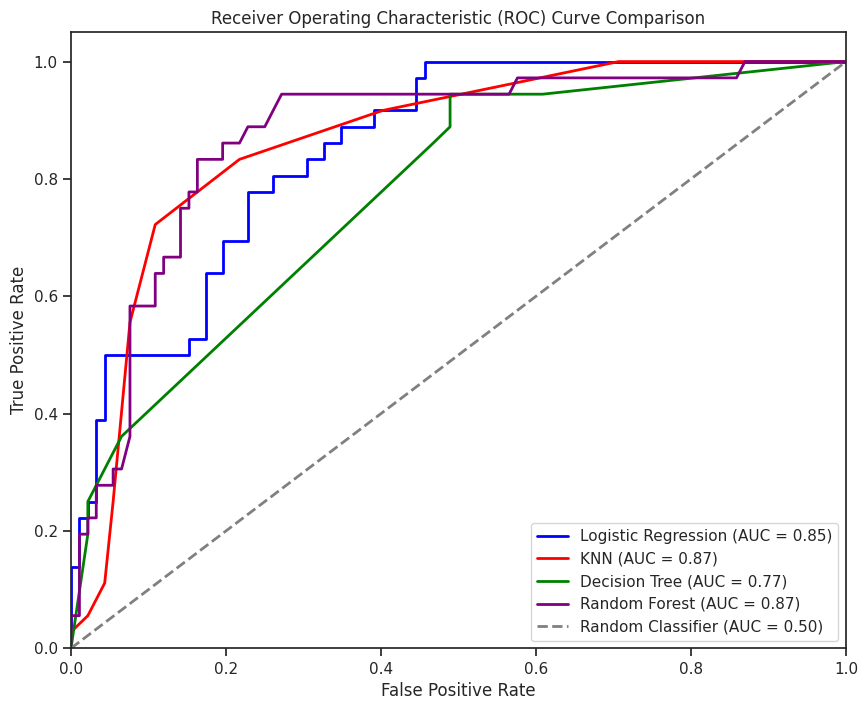

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class for each model
y_pred_proba_lr = model.predict_proba(test_X)[:, 1]
y_pred_proba_knn = knn.predict_proba(test_X)[:, 1]
y_pred_proba_dt = dt_model.predict_proba(test_X)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(test_X)[:, 1]

# Calculate ROC curves and AUC scores
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, y_pred_proba_lr)
auc_lr = roc_auc_score(test_y, y_pred_proba_lr)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, y_pred_proba_knn)
auc_knn = roc_auc_score(test_y, y_pred_proba_knn)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, y_pred_proba_dt)
auc_dt = roc_auc_score(test_y, y_pred_proba_dt)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_pred_proba_rf)
auc_rf = roc_auc_score(test_y, y_pred_proba_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()